<a href="https://colab.research.google.com/github/thaynaconceicao/dspython/blob/main/dataset_sus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

file_path = "/content/drive/MyDrive/arquivos/dataset_IGD.csv"
df = pd.read_csv(file_path)
df

Mounted at /content/drive


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import graphviz

In [ ]:
df = df.rename(columns={'PatientId': 'Patient_ID'})
df = df.rename(columns={'Gender': 'Gender_Label'})
df = df.rename(columns={'AppointmentID': 'Consultation_ID'})
df = df.rename(columns={'ScheduledDay': 'Scheduling_Day'})
df = df.rename(columns={'AppointmentDay': 'Consultation_Day'})
df = df.rename(columns={'Handcap': 'Handicap'})
df = df.rename(columns={'No-show': 'No_show'})
df

,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
df["Patient_ID"] = df["Patient_ID"].astype(int)
df["Scheduling_Day"] = df["Scheduling_Day"].astype(np.datetime64)
df["Consultation_Day"] = df["Consultation_Day"].astype(np.datetime64)
df

,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
import numpy as np

condicoes = [
    (df['Gender_Label'] == 'F'),
    (df['Gender_Label'] == 'M')
]

valores = ['1', '0']

df['Gender'] = np.select(condicoes, valores)
df

,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Gender
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,1
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,1
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,1
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,1


In [ ]:
import numpy as np

condicoes = [
    (df['No_show'] == 'No'),
    (df['No_show'] == 'Yes')
]

valores = ['0', '1']

df['No_show'] = np.select(condicoes, valores)
df

,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Gender
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,1
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,1
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,1
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,1


In [ ]:
df["Gender"] = df["Gender"].astype(int)
df

,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Gender
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,1
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,1
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,1
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,1


In [ ]:
df["No_show"] = df["No_show"].astype(int)

In [ ]:
df = df[df["Age"] < 100]
df

,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Gender
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,1
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,1
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,1
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,1


In [ ]:
df = df[df["Age"] > 0]
df

,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Gender
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,1
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,1
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,1
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,1


In [ ]:
import numpy as np

condicoes = [
    (df['Age'] <= 12),
    (df['Age'] >= 13) & (df['Age'] <=18),
    (df['Age'] > 18) & (df['Age'] <60),
    (df['Age'] >= 60)
]

valores = ['Child', 'Teenager', 'Adult', 'Elderly']

df['Age_Group_Label'] = np.select(condicoes, valores)
df

<ipython-input-11-d82026d70689>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group_Label'] = np.select(condicoes, valores)


,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Gender,Age_Group_Label
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,Elderly
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Adult
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,Elderly
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,Child
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult


In [ ]:
import numpy as np

condicoes = [
    (df['Age_Group_Label'] == 'Child'),
    (df['Age_Group_Label'] == 'Teenager'),
    (df['Age_Group_Label'] == 'Adult'),
    (df['Age_Group_Label'] == 'Elderly')
]

valores = ['1', '2', '3', '4']

df['Age_Group'] = np.select(condicoes, valores)
df

<ipython-input-12-a7192b1013df>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = np.select(condicoes, valores)


,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Gender,Age_Group_Label,Age_Group
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,Elderly,4
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Adult,3
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,Elderly,4
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,Child,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,Adult,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3


In [ ]:
df["Age_Group"] = df["Age_Group"].astype(int)

<ipython-input-13-203ead911a27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_Group"] = df["Age_Group"].astype(int)


In [ ]:
df['Weekday_Label'] = df['Consultation_Day'].dt.day_name()
df

<ipython-input-14-93b61fe1668b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday_Label'] = df['Consultation_Day'].dt.day_name()


,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Gender,Age_Group_Label,Age_Group,Weekday_Label
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,Elderly,4,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Adult,3,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,Elderly,4,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,Child,1,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,Adult,3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday


In [ ]:
import numpy as np

condicoes = [
    (df['Weekday_Label'] == 'Monday'),
    (df['Weekday_Label'] == 'Tuesday'),
    (df['Weekday_Label'] == 'Wednesday'),
    (df['Weekday_Label'] == 'Thursday'),
    (df['Weekday_Label'] == 'Friday'),
    (df['Weekday_Label'] == 'Saturday')
]

valores = ['1', '2', '3', '4', '5', '6']

df['Weekday_Consultation'] = np.select(condicoes, valores)
df

<ipython-input-15-c09ffddb8152>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday_Consultation'] = np.select(condicoes, valores)


,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Gender,Age_Group_Label,Age_Group,Weekday_Label,Weekday_Consultation
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,Elderly,4,Friday,5
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Adult,3,Friday,5
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,Elderly,4,Friday,5
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,Child,1,Friday,5
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,Adult,3,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday,2
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday,2
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday,2
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday,2


In [ ]:
df["Weekday_Consultation"] = df["Weekday_Consultation"].astype(int)

<ipython-input-16-36e2bedb5886>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Weekday_Consultation"] = df["Weekday_Consultation"].astype(int)


In [ ]:
from datetime import timedelta
df['Waiting_Days'] = (df['Consultation_Day'] - df['Scheduling_Day'] + timedelta(days=1)).dt.days
df

<ipython-input-17-e2fd382d8095>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Waiting_Days'] = (df['Consultation_Day'] - df['Scheduling_Day'] + timedelta(days=1)).dt.days


,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Gender,Age_Group_Label,Age_Group,Weekday_Label,Weekday_Consultation,Waiting_Days
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,Elderly,4,Friday,5,0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Adult,3,Friday,5,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,Elderly,4,Friday,5,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,Child,1,Friday,5,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,Adult,3,Friday,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday,2,35
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday,2,35
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday,2,41
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,1,Adult,3,Tuesday,2,41


In [ ]:
import numpy as pd
condicoes = [
    (df['Waiting_Days'] <= 7),
    (df['Waiting_Days'] >= 8) & (df['Waiting_Days'] <= 14),
    (df['Waiting_Days'] >= 15) & (df['Waiting_Days'] <= 21),
    (df['Waiting_Days'] >= 22)
]

valores = ['Short', 'Intermediate', 'Long', 'Very Long']

df['Waiting_Label'] = np.select(condicoes, valores)
df

<ipython-input-18-9c6dc563a79d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Waiting_Label'] = np.select(condicoes, valores)


,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handicap,SMS_received,No_show,Gender,Age_Group_Label,Age_Group,Weekday_Label,Weekday_Consultation,Waiting_Days,Waiting_Label
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,0,1,Elderly,4,Friday,5,0,Short
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,0,0,Adult,3,Friday,5,0,Short
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,0,0,1,Elderly,4,Friday,5,0,Short
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,0,0,1,Child,1,Friday,5,0,Short
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,0,0,1,Adult,3,Friday,5,0,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,...,0,1,0,1,Adult,3,Tuesday,2,35,Very Long
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,...,0,1,0,1,Adult,3,Tuesday,2,35,Very Long
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,...,0,1,0,1,Adult,3,Tuesday,2,41,Very Long
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,...,0,1,0,1,Adult,3,Tuesday,2,41,Very Long


In [ ]:
import numpy as pd
condicoes = [
    (df['Waiting_Label'] == 'Short'),
    (df['Waiting_Label'] == 'Intermediate'),
    (df['Waiting_Label'] == 'Long'),
    (df['Waiting_Label'] == 'Very Long')
]

valores = ['1', '2', '3', '4']

df['Waiting_Rating'] = np.select(condicoes, valores)
df

<ipython-input-19-45479081cb97>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Waiting_Rating'] = np.select(condicoes, valores)


,Patient_ID,Consultation_ID,Gender_Label,Scheduling_Day,Consultation_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,SMS_received,No_show,Gender,Age_Group_Label,Age_Group,Weekday_Label,Weekday_Consultation,Waiting_Days,Waiting_Label,Waiting_Rating
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,1,Elderly,4,Friday,5,0,Short,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,0,Adult,3,Friday,5,0,Short,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,0,1,Elderly,4,Friday,5,0,Short,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,0,1,Child,1,Friday,5,0,Short,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,0,1,Adult,3,Friday,5,0,Short,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,...,1,0,1,Adult,3,Tuesday,2,35,Very Long,4
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,...,1,0,1,Adult,3,Tuesday,2,35,Very Long,4
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,...,1,0,1,Adult,3,Tuesday,2,41,Very Long,4
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,...,1,0,1,Adult,3,Tuesday,2,41,Very Long,4


In [ ]:
new_order= ['Patient_ID', 'Consultation_ID', 'Gender_Label', 'Gender', 'Scheduling_Day', 'Consultation_Day', 'Waiting_Days', 'Waiting_Label', 'Waiting_Rating', 'Weekday_Label', 'Weekday_Consultation', 'Age', 'Age_Group_Label', 'Age_Group', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show']
df = df[new_order]
df

,Patient_ID,Consultation_ID,Gender_Label,Gender,Scheduling_Day,Consultation_Day,Waiting_Days,Waiting_Label,Waiting_Rating,Weekday_Label,...,Age_Group_Label,Age_Group,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,1,2016-04-29 18:38:08,2016-04-29,0,Short,1,Friday,...,Elderly,4,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,0,2016-04-29 16:08:27,2016-04-29,0,Short,1,Friday,...,Adult,3,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,1,2016-04-29 16:19:04,2016-04-29,0,Short,1,Friday,...,Elderly,4,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,1,2016-04-29 17:29:31,2016-04-29,0,Short,1,Friday,...,Child,1,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,1,2016-04-29 16:07:23,2016-04-29,0,Short,1,Friday,...,Adult,3,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,1,2016-05-03 09:15:35,2016-06-07,35,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3596266328735,5650093,F,1,2016-05-03 07:27:33,2016-06-07,35,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0
110524,15576631729893,5630692,F,1,2016-04-27 16:03:52,2016-06-07,41,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0
110525,92134931435557,5630323,F,1,2016-04-27 15:09:23,2016-06-07,41,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0


In [ ]:
df.dtypes

Patient_ID                       int64
Consultation_ID                  int64
Gender_Label                    object
Gender                           int64
Scheduling_Day          datetime64[ns]
Consultation_Day        datetime64[ns]
Waiting_Days                     int64
Waiting_Label                   object
Waiting_Rating                  object
Weekday_Label                   object
Weekday_Consultation             int64
Age                              int64
Age_Group_Label                 object
Age_Group                        int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handicap                         int64
SMS_received                     int64
No_show                          int64
dtype: object

In [ ]:
df = df.drop(27033)
df = df.drop(55226)
df = df.drop(64175)
df = df.drop(71533)
df = df.drop(72362)

In [ ]:
df.Waiting_Days.sort_values()

0           0
56496       0
56505       0
56507       0
56508       0
         ... 
102791    179
102790    179
102789    179
102788    179
102786    179
Name: Waiting_Days, Length: 106971, dtype: int64

In [ ]:
df

,Patient_ID,Consultation_ID,Gender_Label,Gender,Scheduling_Day,Consultation_Day,Waiting_Days,Waiting_Label,Waiting_Rating,Weekday_Label,...,Age_Group_Label,Age_Group,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,1,2016-04-29 18:38:08,2016-04-29,0,Short,1,Friday,...,Elderly,4,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,0,2016-04-29 16:08:27,2016-04-29,0,Short,1,Friday,...,Adult,3,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,1,2016-04-29 16:19:04,2016-04-29,0,Short,1,Friday,...,Elderly,4,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,1,2016-04-29 17:29:31,2016-04-29,0,Short,1,Friday,...,Child,1,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,1,2016-04-29 16:07:23,2016-04-29,0,Short,1,Friday,...,Adult,3,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,1,2016-05-03 09:15:35,2016-06-07,35,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3596266328735,5650093,F,1,2016-05-03 07:27:33,2016-06-07,35,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0
110524,15576631729893,5630692,F,1,2016-04-27 16:03:52,2016-06-07,41,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0
110525,92134931435557,5630323,F,1,2016-04-27 15:09:23,2016-06-07,41,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cores = ['purple', 'red', 'orange', 'yellow']

cores1 = ['pink', 'lightblue']

cores3 = ['#33CC33', '#FF3333']

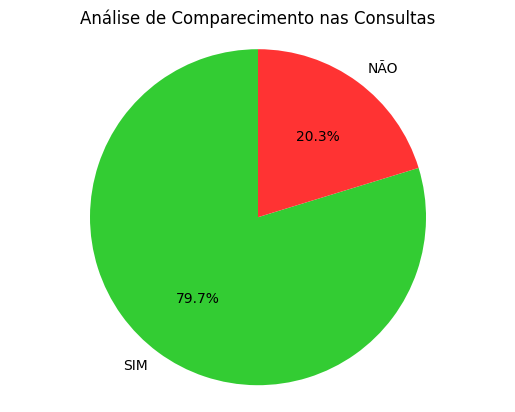

In [ ]:
comparecimento = df['No_show'].value_counts()
labels = 'SIM', 'NÃO'
sizes = comparecimento.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = cores3)
plt.axis('equal')
plt.title('Análise de Comparecimento nas Consultas')
plt.show()

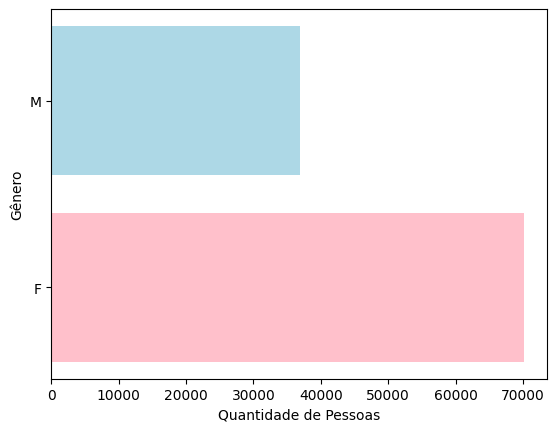

In [ ]:
contagem_genero = df['Gender_Label'].value_counts()

plt.barh(contagem_genero.index, contagem_genero.values, color = cores1)

plt.xlabel('Quantidade de Pessoas')
plt.ylabel('Gênero')



plt.show()

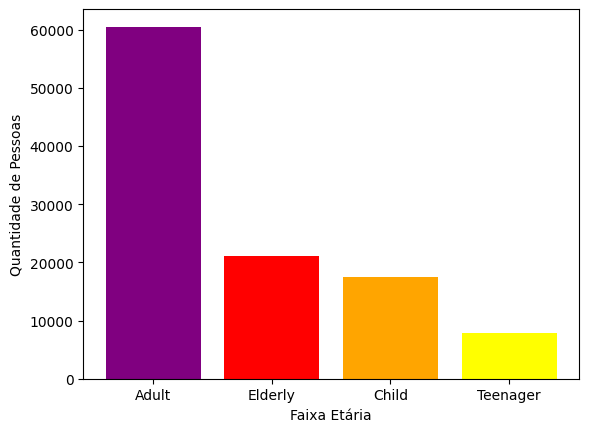

In [ ]:
contagem_faixa = df['Age_Group_Label'].value_counts()

plt.bar(contagem_faixa.index, contagem_faixa.values, color=cores)

plt.xlabel('Faixa Etária')

plt.ylabel('Quantidade de Pessoas')

plt.show()

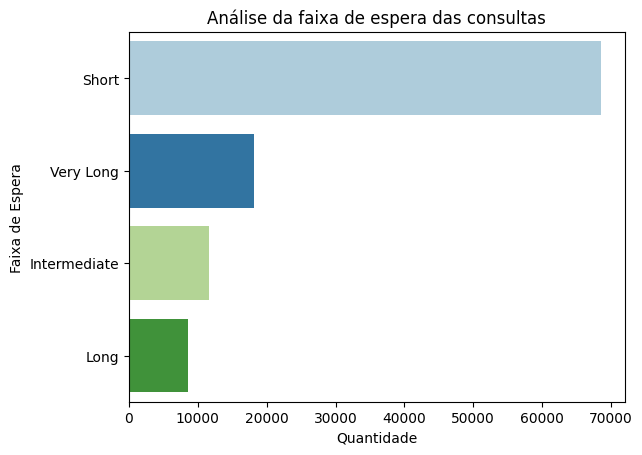

In [ ]:
colors = sns.color_palette("Paired")

espera = df['Waiting_Label'].value_counts().head(4)
ax = sns.barplot(x=espera.values, y=espera.index, palette=colors)

ax.set(xlabel='Quantidade', ylabel='Faixa de Espera', title='Análise da faixa de espera das consultas')

plt.show()

Text(0.5, 1.0, 'Gráfico de Análise de tempo de espera das consultas')

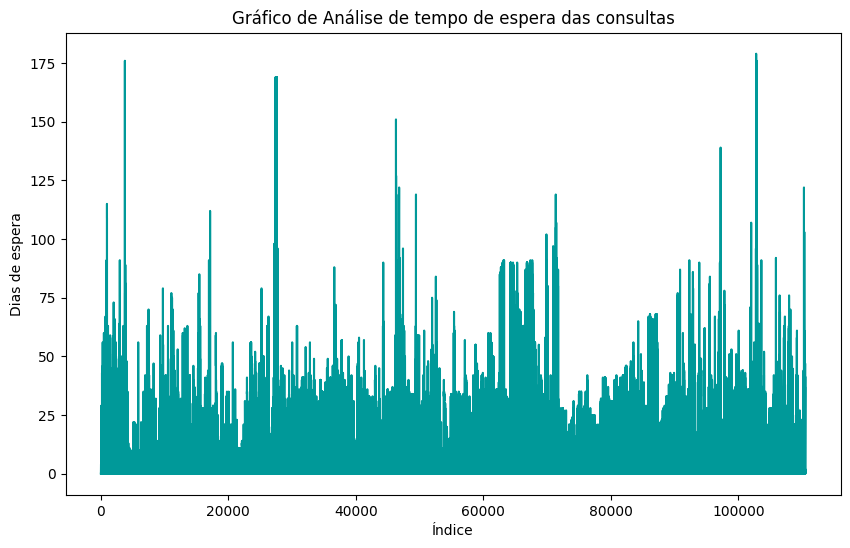

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(df['Waiting_Days'], color = '#009999')
ax.set_xlabel('Índice')
ax.set_ylabel('Dias de espera')
ax.set_title('Gráfico de Análise de tempo de espera das consultas')

In [ ]:
! pip install  --upgrade category_encoders
from category_encoders.ordinal import OrdinalEncoder

encoder = OrdinalEncoder(cols=df.columns[0:21])
encoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00


OrdinalEncoder(cols=Index(['Patient_ID', 'Consultation_ID', 'Gender_Label', 'Gender',
       'Scheduling_Day', 'Consultation_Day', 'Waiting_Days', 'Waiting_Label',
       'Waiting_Rating', 'Weekday_Label', 'Weekday_Consultation', 'Age',
       'Age_Group_Label', 'Age_Group', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received'],
      dtype='object'))

In [ ]:
X = df.drop(columns='No_show')
Y = df['No_show']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 21)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((85576, 21), (21395, 21), (85576,), (21395,))

In [ ]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train

,Patient_ID,Consultation_ID,Gender_Label,Gender,Scheduling_Day,Consultation_Day,Waiting_Days,Waiting_Label,Waiting_Rating,Weekday_Label,...,Age,Age_Group_Label,Age_Group,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
94129,1,1,1,1,-1.0,-1.0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9343,2,2,2,2,-1.0,-1.0,2,2,2,2,...,2,1,1,2,1,2,2,1,1,2
48812,3,3,2,2,-1.0,-1.0,3,2,2,1,...,3,1,1,3,1,1,1,1,1,2
42993,4,4,1,1,-1.0,-1.0,4,1,1,3,...,4,2,2,4,1,1,1,1,1,1
34153,5,5,2,2,-1.0,-1.0,5,3,3,4,...,5,1,1,5,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84761,52306,85572,1,1,-1.0,-1.0,29,1,1,4,...,63,3,3,30,1,1,1,2,1,2
9238,44720,85573,2,2,-1.0,-1.0,13,4,4,2,...,25,1,1,50,2,1,1,1,1,2
73845,52307,85574,2,2,-1.0,-1.0,2,2,2,4,...,38,1,1,16,1,1,1,1,1,2
73201,52308,85575,2,2,-1.0,-1.0,21,3,3,2,...,35,1,1,57,1,1,1,1,1,1


In [ ]:
X_test

,Patient_ID,Consultation_ID,Gender_Label,Gender,Scheduling_Day,Consultation_Day,Waiting_Days,Waiting_Label,Waiting_Rating,Weekday_Label,...,Age,Age_Group_Label,Age_Group,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
16418,-1.0,-1.0,2,2,-1.0,-1.0,2.0,2,2,2,...,43,4,4,1,2,1,1,1,1,2
56222,-1.0,-1.0,2,2,-1.0,-1.0,2.0,2,2,4,...,71,3,3,36,1,2,1,1,1,2
68582,21822.0,-1.0,2,2,-1.0,-1.0,2.0,2,2,3,...,33,1,1,39,1,1,1,1,1,2
12503,-1.0,-1.0,1,1,-1.0,-1.0,2.0,2,2,4,...,56,1,1,45,1,1,1,1,1,2
36641,6279.0,-1.0,2,2,-1.0,-1.0,19.0,1,1,3,...,34,1,1,22,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96903,44426.0,-1.0,2,2,-1.0,-1.0,14.0,2,2,2,...,28,1,1,33,1,1,1,1,1,1
86582,3842.0,-1.0,1,1,-1.0,-1.0,2.0,2,2,3,...,13,1,1,11,1,1,1,1,1,2
63096,-1.0,-1.0,2,2,-1.0,-1.0,69.0,1,1,4,...,25,1,1,11,1,1,1,1,1,2
52967,-1.0,-1.0,2,2,-1.0,-1.0,20.0,2,2,1,...,1,1,1,41,1,1,1,1,1,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=5)

clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

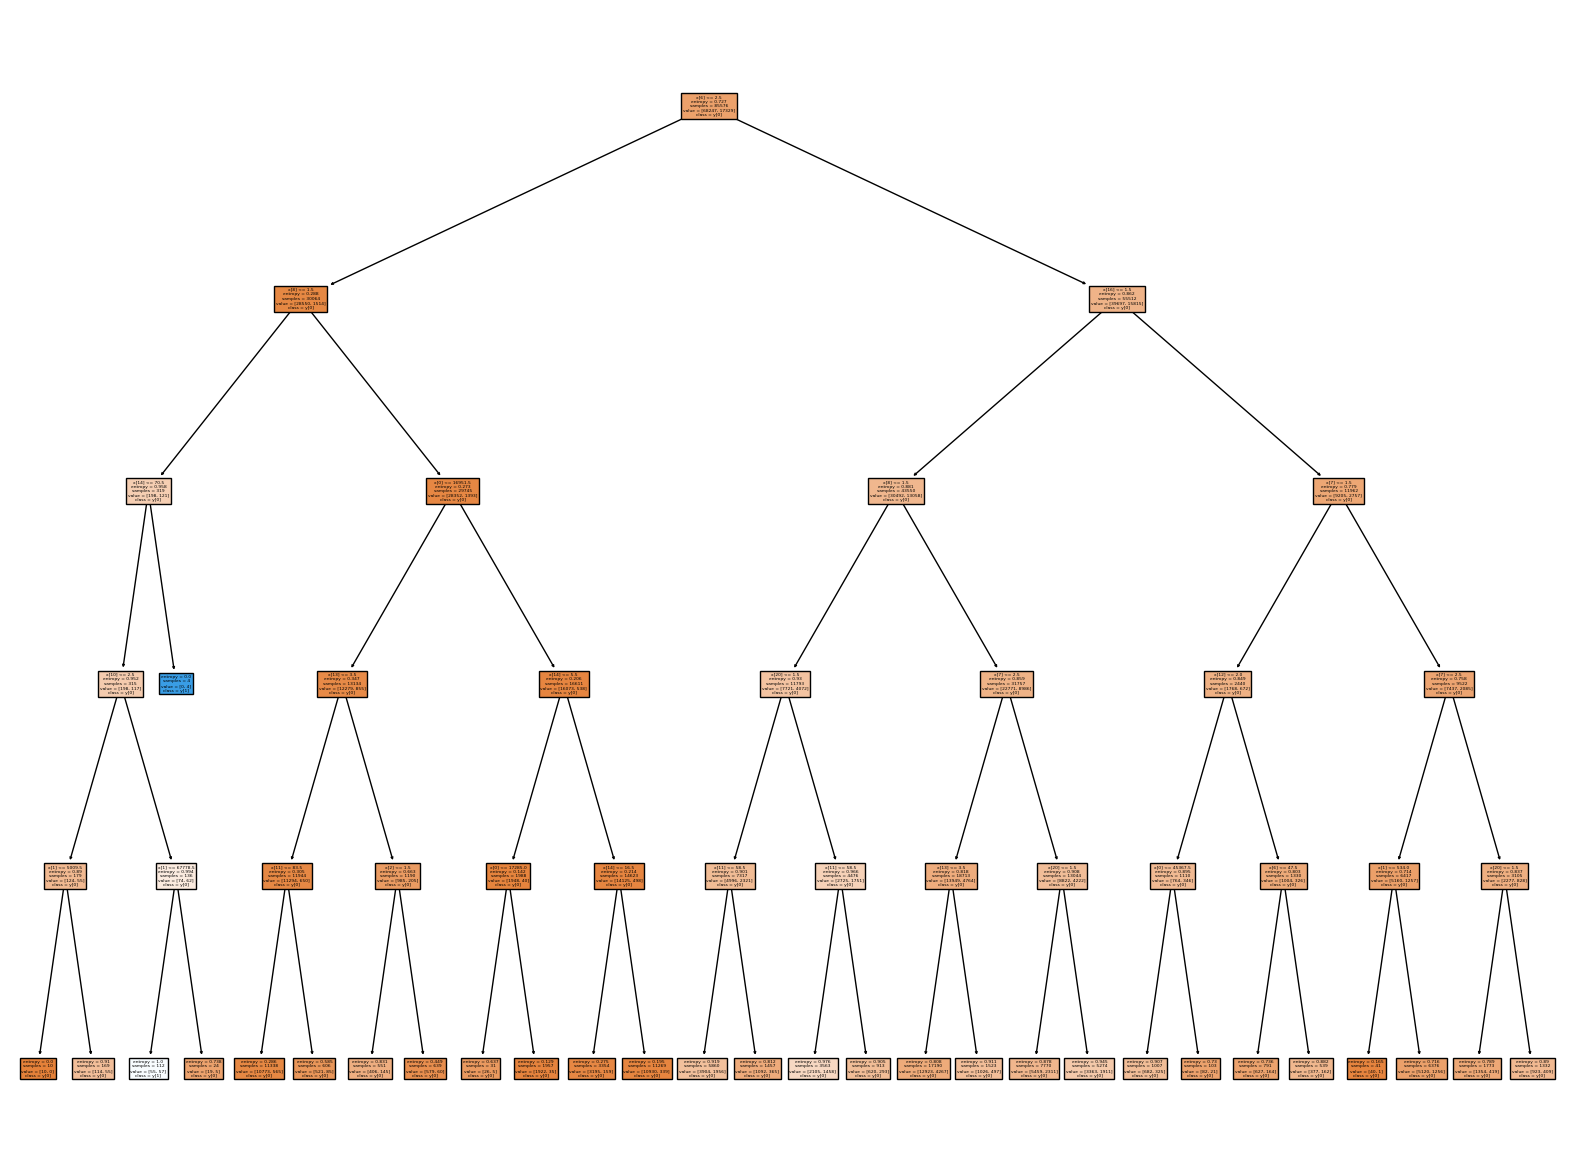

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(clf,class_names=True, filled=True)
plt.show()

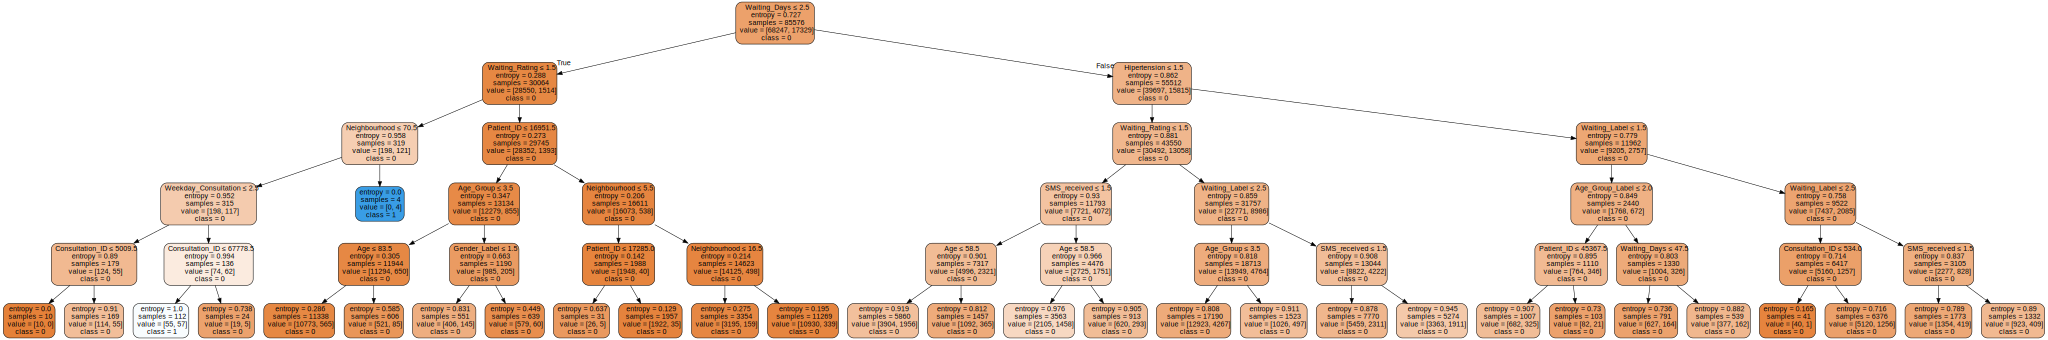

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_train.columns,
                                class_names=Y_train.values.astype(str),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
import numpy as np
import pandas as pd
importances = pd.DataFrame({
  'Feature': X_train.columns,
  'Importancia': clf.feature_importances_
})
importances = importances.sort_values(by='Importancia', ascending=False)
importances = importances.set_index('Feature')
importances

,Importancia
Feature,
Waiting_Days,0.811946
Waiting_Rating,0.049752
Waiting_Label,0.028056
Hipertension,0.023470
Age_Group,0.023151
Patient_ID,0.019961
SMS_received,0.015018
Age,0.013282
Gender_Label,0.006195


In [ ]:
from sklearn.metrics import accuracy_score

Y_pred_en=clf.predict(X_test)

accuracy_score(Y_test, Y_pred_en)

0.7965412479551297

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, Y_pred_en))

[[17024    28]
 [ 4325    18]]


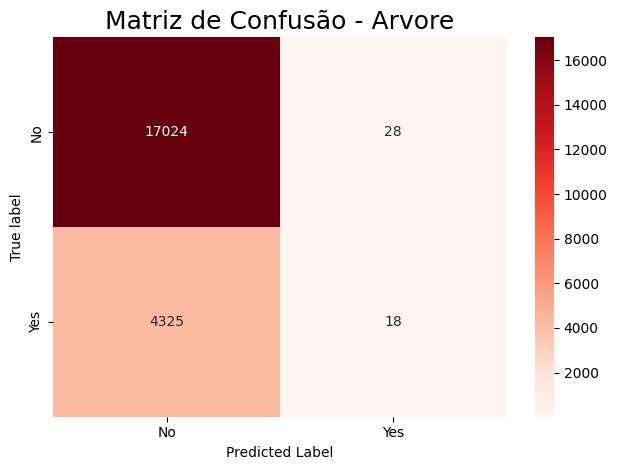

In [ ]:
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(Y_test, Y_pred_en), annot=True,ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão - Arvore", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticklabels(['No', 'Yes'])
plt.tight_layout()
plt.savefig('confusion_arvore.png')

In [ ]:
df2 = df
df2

,Patient_ID,Consultation_ID,Gender_Label,Gender,Scheduling_Day,Consultation_Day,Waiting_Days,Waiting_Label,Waiting_Rating,Weekday_Label,...,Age_Group_Label,Age_Group,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,1,2016-04-29 18:38:08,2016-04-29,0,Short,1,Friday,...,Elderly,4,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,0,2016-04-29 16:08:27,2016-04-29,0,Short,1,Friday,...,Adult,3,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,1,2016-04-29 16:19:04,2016-04-29,0,Short,1,Friday,...,Elderly,4,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,1,2016-04-29 17:29:31,2016-04-29,0,Short,1,Friday,...,Child,1,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,1,2016-04-29 16:07:23,2016-04-29,0,Short,1,Friday,...,Adult,3,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,1,2016-05-03 09:15:35,2016-06-07,35,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3596266328735,5650093,F,1,2016-05-03 07:27:33,2016-06-07,35,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0
110524,15576631729893,5630692,F,1,2016-04-27 16:03:52,2016-06-07,41,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0
110525,92134931435557,5630323,F,1,2016-04-27 15:09:23,2016-06-07,41,Very Long,4,Tuesday,...,Adult,3,MARIA ORTIZ,0,0,0,0,0,1,0


In [ ]:
df2 = df2.drop(['Waiting_Days','Waiting_Label', 'Patient_ID', 'Age', 'Consultation_ID', 'Age_Group_Label', 'Scheduling_Day', 'Gender_Label', 'Weekday_Label', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handicap'], axis=1)

In [ ]:
df2

,Gender,Consultation_Day,Waiting_Rating,Weekday_Consultation,Age_Group,Neighbourhood,SMS_received,No_show
0,1,2016-04-29,1,5,4,JARDIM DA PENHA,0,0
1,0,2016-04-29,1,5,3,JARDIM DA PENHA,0,0
2,1,2016-04-29,1,5,4,MATA DA PRAIA,0,0
3,1,2016-04-29,1,5,1,PONTAL DE CAMBURI,0,0
4,1,2016-04-29,1,5,3,JARDIM DA PENHA,0,0
...,...,...,...,...,...,...,...,...
110522,1,2016-06-07,4,2,3,MARIA ORTIZ,1,0
110523,1,2016-06-07,4,2,3,MARIA ORTIZ,1,0
110524,1,2016-06-07,4,2,3,MARIA ORTIZ,1,0
110525,1,2016-06-07,4,2,3,MARIA ORTIZ,1,0


In [ ]:
! pip install  --upgrade category_encoders
from category_encoders.ordinal import OrdinalEncoder

encoder = OrdinalEncoder(cols=df2.columns[0:7])
encoder

OrdinalEncoder(cols=Index(['Gender', 'Consultation_Day', 'Waiting_Rating', 'Weekday_Consultation',
       'Age_Group', 'Neighbourhood', 'SMS_received'],
      dtype='object'))

In [ ]:
X = df2.drop(columns='No_show')
Y = df2['No_show']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 8)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((85576, 7), (21395, 7), (85576,), (21395,))

In [ ]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=5)

clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

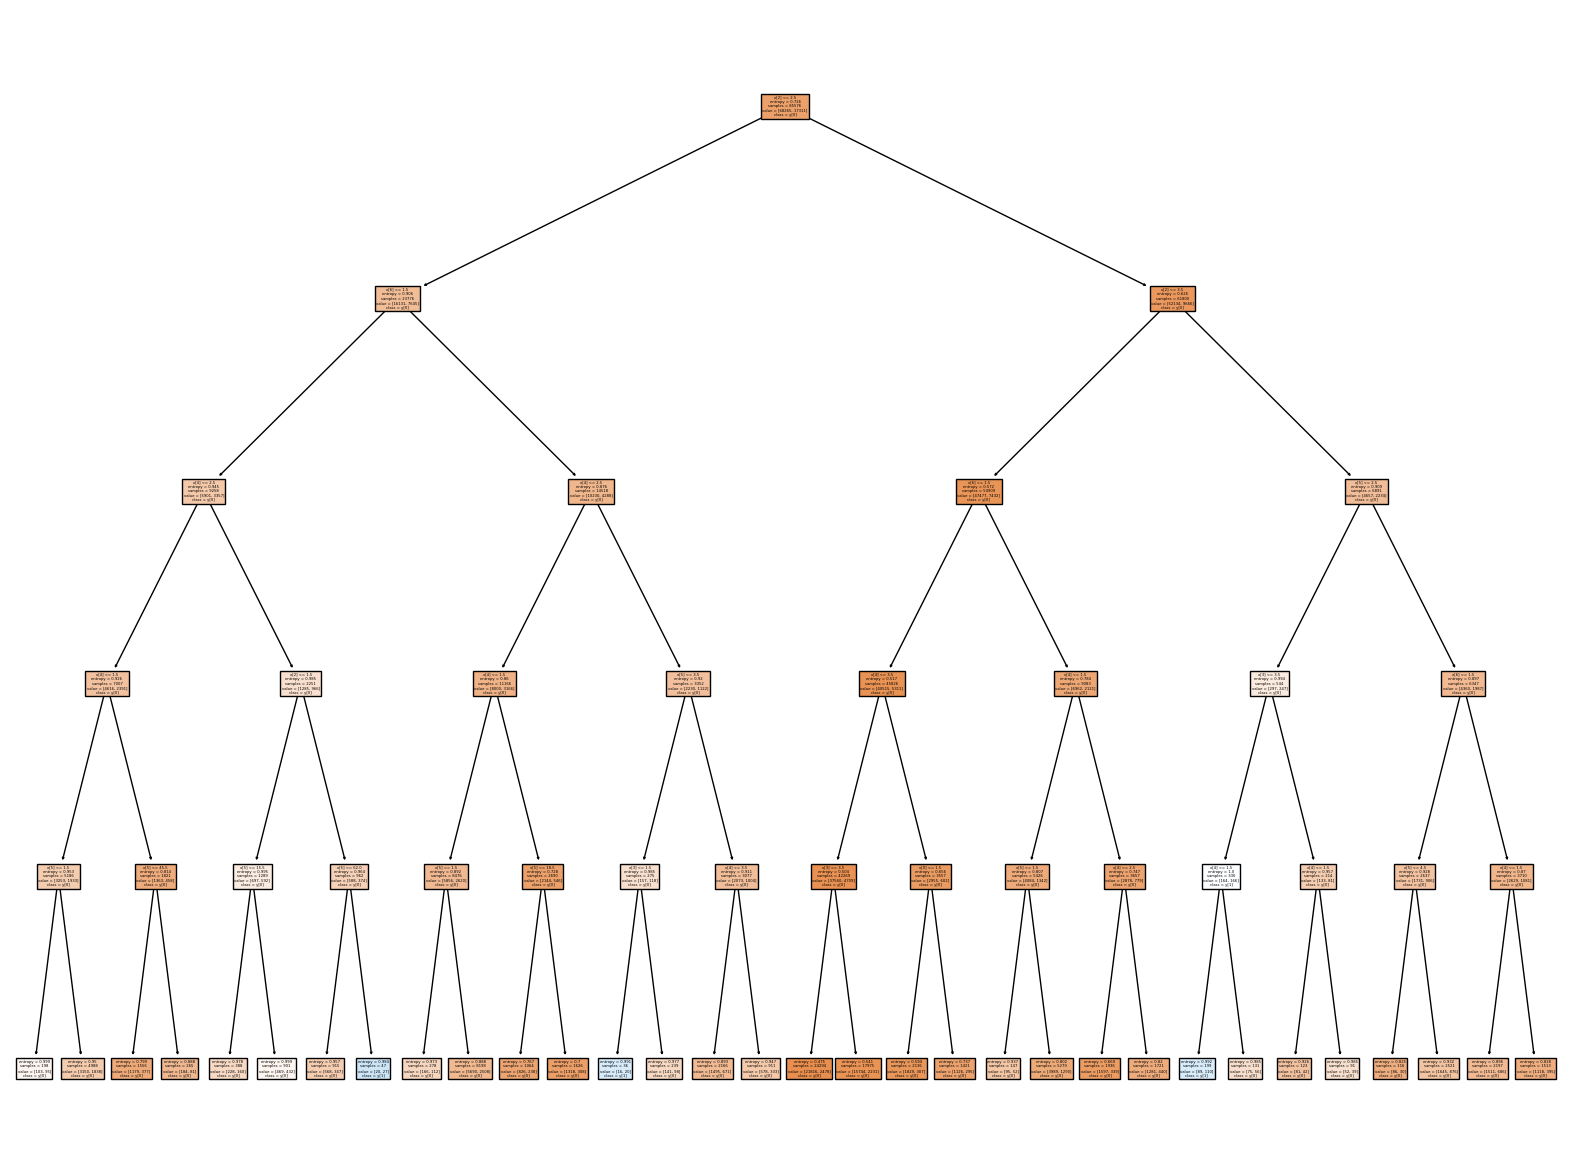

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(clf,class_names=True, filled=True)
plt.show()

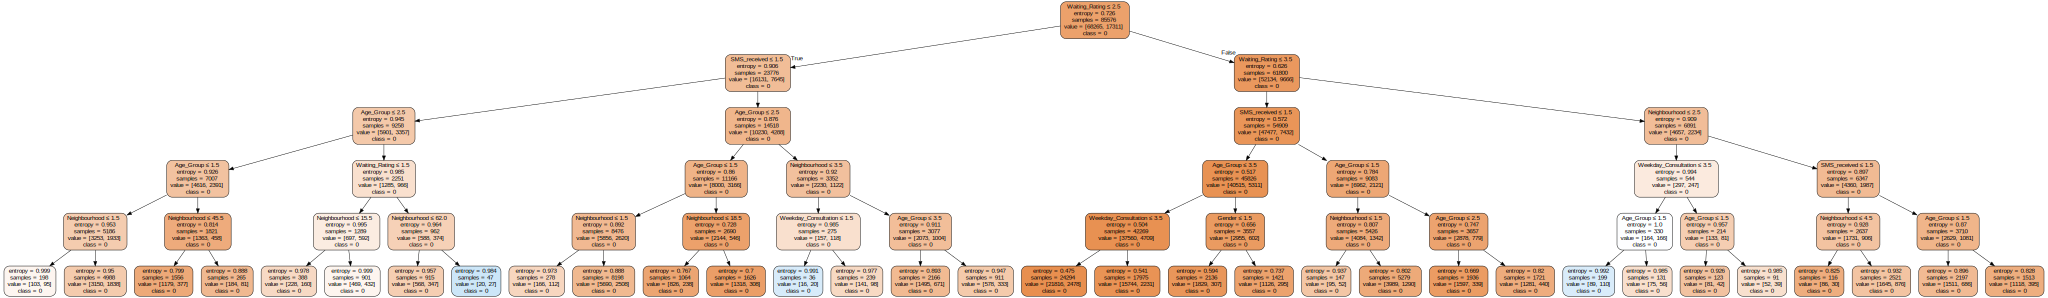

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_train.columns,
                                class_names=Y_train.values.astype(str),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph